In [2]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import SimpleITK as sitk
from scipy import ndimage
import time
import copy
from utils.img_processing import correct_bias
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils import data
import torch.nn.functional as F
from torch.optim import lr_scheduler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import SimpleITK as sitk
from scipy import ndimage
import time
import copy
from utils.img_processing import save_npy,zip_folder
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils import data
import torch.nn.functional as F
from torch.optim import lr_scheduler
# from models.CNN_model import Net1
from models.SENet import Model
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sksurv.datasets import load_flchain
from sksurv.util import Surv
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from lifelines.utils import concordance_index
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [3]:
df = pd.read_csv('G:/glioma/final_data/glioma_survive/5hmc.csv')
df_huashan = pd.read_csv('G:/glioma/final_data/glioma_survive/huashan.csv')
df_huashan_mr = pd.read_csv('G:/glioma/final_data/glioma_survive/only_mr/all_exter.csv')
# df_ = pd.merge(df_huashan_mr,df_huashan,how = 'left')
# df = pd.merge(df,df_,how='inner')
# df
df = df.rename(columns={'score': 'score_5hmc'})
df = pd.merge(df,df_huashan_mr,how = 'inner')
df

,patient,PCDHB12,PCDHB15,HMX3,NEUROG3,KRTAP27.1,AC073528.1,LCE1B,ENSG00000263317.1,ENSG00000257748.1,...,ENSG00000257056.2,ENSG00000261340.1,ENSG00000227088.1,score_5hmc,score,WHO,Age,Gender,survival_month,status_dead
0,Pan_Jing_Wei,1.270740,0.556749,0.305066,1.122591,0.305066,0.305066,0.305066,7.317609,5.609691,...,2.350412,1.242795,1.900387,2.688939,1.712174,4,36.0,1,27.13,1
1,Geng_Xin,1.146682,0.789458,0.313604,0.000000,0.571061,0.313604,0.000000,7.228131,4.197778,...,1.290370,1.960443,3.040812,2.738133,1.501577,4,28.0,0,35.30,1
2,Wu_Jing_Zhen,0.964634,1.098879,0.964634,0.816604,0.000000,0.251342,0.251342,7.419974,4.848943,...,2.446527,2.117119,2.714526,2.699037,1.112021,3,60.0,0,69.53,0
3,Xin_Wen,0.459120,0.459120,0.459120,0.459120,0.459120,0.459120,0.459120,7.188412,4.541373,...,1.690896,2.118644,1.690896,4.075898,1.189126,2,33.0,0,69.47,0
4,Zhang_Guo_Wei,0.640941,0.640941,0.355775,0.188827,0.188827,0.000000,0.000000,6.614257,4.313171,...,0.893855,0.000000,0.000000,3.437584,1.085429,2,30.0,1,66.63,0
5,Qin_Mei_Hua,1.054931,0.442765,0.781077,0.442765,0.000000,0.000000,0.000000,6.678935,4.689391,...,1.089056,0.000000,0.000000,2.654135,0.754590,2,30.0,1,53.47,1
6,Ling_Yan_Rong,1.180956,0.000000,0.591592,0.000000,0.000000,0.325909,0.000000,6.804322,4.589524,...,2.027437,2.027437,1.343919,2.845677,1.335904,4,51.0,1,20.87,1
7,Zhuang_Zi_Ming,0.000000,0.849303,0.849303,0.000000,0.617694,0.000000,0.341656,6.863862,4.666522,...,2.088407,0.000000,0.000000,3.337816,0.607842,2,32.0,1,66.20,0
8,Huang_Xue_Yu,0.531428,0.000000,0.531428,0.531428,0.531428,0.000000,0.531428,6.494208,3.186544,...,2.678714,0.000000,1.888081,1.987195,1.610942,4,49.0,0,17.97,1
9,Shen_Lin_Jia,1.378695,0.848129,1.302740,0.341100,0.485512,0.180607,0.341100,6.672616,4.090336,...,2.072716,1.380391,0.000000,1.284966,1.554723,4,72.0,0,9.73,1


In [6]:
df[df['patient'] == 'Lu_Mei']

,patient,PCDHB12,PCDHB15,HMX3,NEUROG3,KRTAP27.1,AC073528.1,LCE1B,ENSG00000263317.1,ENSG00000257748.1,...,ENSG00000257056.2,ENSG00000261340.1,ENSG00000227088.1,score_5hmc,score,WHO,Age,Gender,survival_month,status_dead
56,Lu_Mei,0.982789,0.832709,0.25732,0.665183,0.475617,0.665183,0.25732,7.186571,3.684627,...,1.12818,1.753458,0.0,3.002076,1.847192,2,25.0,0,27.1,1


In [7]:
df_huashan_mr[df_huashan_mr['patient'] == 'Lu_Mei']

,patient,score,WHO,Age,Gender,survival_month,status_dead
84,Lu_Mei,1.847192,2,25.0,0,27.1,1


In [8]:
df_train, df_test, y_train, y_test = train_test_split(df,df['patient'].values,test_size=0.2,random_state=2022)

In [9]:
from lifelines import CoxPHFitter
col = ['survival_month','status_dead','score','score_5hmc']
cph = CoxPHFitter()
cph.fit(df_train[col], duration_col='survival_month', event_col='status_dead')
cph_score = cph.score(df_test[col], scoring_method='concordance_index')
print("CPH C-index: ", cph_score)

CPH C-index:  0.7230769230769231


In [7]:
train = pd.read_csv('/root/autodl-tmp/MR_csv/glioma_survive/mr_pathology/train.csv')
test = pd.read_csv('/root/autodl-tmp/MR_csv/glioma_survive/mr_pathology/test.csv')
survival_label = ['patient','survival_month','status_dead','WHO','Age ','Gender']
hazard_label = 'score'
#定义0-1标准化的代码
import numpy as np
def normalize(X, X_min, X_max):    
    """    对矩阵X进行0-1标准化    """    
    X_norm = (X - X_min) / (X_max - X_min)    
    return X_norm
def restore_data(X,X_min,X_max):
    X_origin = X * (X_max - X_min) + X_min
    return X_origin
# 训练集归一化
X_processing =train[[hazard_label]].values
max_value, min_value = X_processing.max(),X_processing.min()
scaler = MinMaxScaler()
scaler.fit(X_processing)
X_processing1 = scaler.transform(X_processing)
train[hazard_label] = X_processing1
all1 = survival_label + [hazard_label]

# 测试集归一化
X_processing =test[[hazard_label]].values
X_processing = normalize(X_processing,min_value,max_value).squeeze(-1)
test[hazard_label] = X_processing

In [10]:
# 单变量其他生存模型分析 --- 数据预处理
y_train_ = Surv.from_dataframe(
    event='status_dead', 
    time='survival_month', 
    data=train)

# 测试集
y_test_ = Surv.from_dataframe(
    event='status_dead', 
    time='survival_month', 
    data=test)
train_gene = train[hazard_label].values.reshape(-1,1)
test_gene = test[hazard_label].values.reshape(-1,1)

In [11]:
train_gene

array([[0.46676612],
       [0.03181288],
       [0.32891224],
       [0.53261096],
       [0.0931911 ],
       [0.29935012],
       [0.87083695],
       [0.71959673],
       [0.57477801],
       [0.44578905],
       [0.17422789],
       [0.5775854 ],
       [0.33696781],
       [0.41348077],
       [0.19729495],
       [0.28260614],
       [0.22575358],
       [0.79129932],
       [0.33845739],
       [0.73221698],
       [0.64047216],
       [0.2653879 ],
       [0.39014598],
       [0.21483125],
       [0.19419822],
       [0.48766664],
       [0.67510742],
       [0.28591765],
       [0.62619317],
       [0.38246354],
       [0.8943299 ],
       [0.30066952],
       [0.61521188],
       [0.29608663],
       [0.13144612],
       [0.68456909],
       [0.31024572],
       [0.12559302],
       [0.20491465],
       [0.07196237],
       [0.34412326],
       [0.32380778],
       [0.36744244],
       [0.17744835],
       [0.31778091],
       [0.48939227],
       [0.8850096 ],
       [0.242

In [12]:
# SVM 模型
from sksurv.svm import FastKernelSurvivalSVM
svm = FastKernelSurvivalSVM(random_state=2023,max_iter=400,kernel='rbf',optimizer= "rbtree" )
svm.fit(train_gene, y_train_)
svm_score = svm.score(test_gene,y_test_)
print("svm C-index: ", svm_score)

svm C-index:  0.8015463917525774


In [13]:
from sksurv.datasets import load_veterans_lung_cancer
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd

from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)
from sksurv.datasets import load_flchain, load_gbsg2
from sksurv.functions import StepFunction
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.preprocessing import OneHotEncoder, encode_categorical
from sksurv.util import Surv
# cox 模型
cph = CoxPHSurvivalAnalysis()
cph.fit(train_gene, y_train_)
cph_score = cph.score(test_gene,y_test_)
print("cph C-index: ", cph_score)

cph C-index:  0.8015463917525774


Text(0.5, 1.0, 'Time ROC')

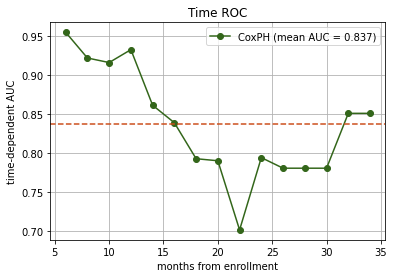

In [16]:
va_times = np.arange(6, 36, 2)
cph_risk_scores = cph.predict(test_gene)
cph_auc, cph_mean_auc = cumulative_dynamic_auc(y_train_, y_test_, cph_risk_scores, va_times)
plt.plot(va_times, cph_auc,color=(0.2, 0.4, 0.1) ,marker="o",label=f"CoxPH (mean AUC = {cph_mean_auc:.3f})")
plt.axhline(cph_mean_auc, linestyle="--",color=(0.8, 0.3, 0.1))
plt.xlabel("months from enrollment")
plt.ylabel("time-dependent AUC")
plt.legend(loc="upper right")
plt.grid(True)
plt.title('Time ROC')

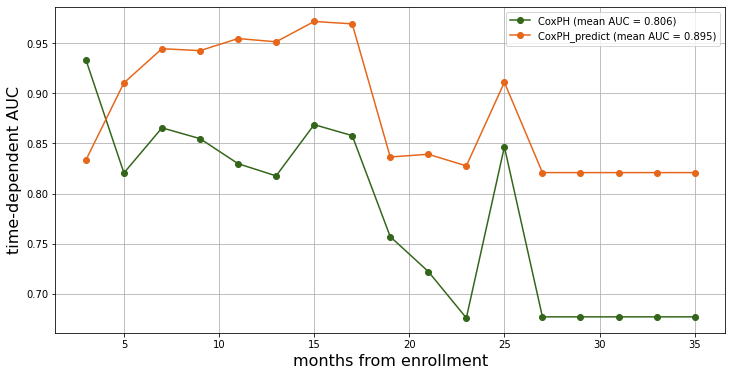

In [11]:
plt.figure(figsize=(12,6))
cph_risk_scores_ = cph.predict(test_gene_predict)
cph_auc_predict, cph_mean_auc_predict = cumulative_dynamic_auc(y_train_, y_test_predict, cph_risk_scores_, va_times)
plt.plot(va_times, cph_auc,color=(0.2, 0.4, 0.1),marker="o",label=f"CoxPH (mean AUC = {cph_mean_auc:.3f})")
plt.plot(va_times, cph_auc_predict,color=(0.9, 0.4, 0.1),marker="o",label=f"CoxPH_predict (mean AUC = {cph_mean_auc_predict:.3f})")
# plt.axhline(cph_mean_auc, linestyle="--")
plt.xlabel("months from enrollment",fontsize=16)
plt.ylabel("time-dependent AUC",fontsize=16)
plt.legend(loc="upper right",fontsize=10)
plt.grid(True)
# plt.title('Time-dependent Area under the ROC in CoxPH Model',fontsize=16)

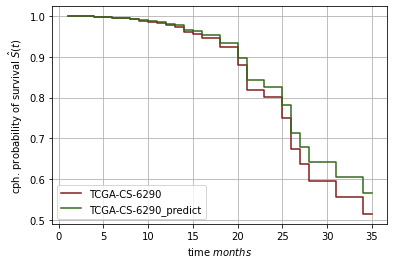

In [18]:
# patient TCGA-CS-6290
time_points = np.arange(1, 36)
pred_surv = cph.predict_survival_function(test_gene)
plt.step(time_points, pred_surv[1](time_points), where="post", label='TCGA-CS-6290',color = (0.5, 0.1, 0.1))
plt.step(time_points, pred_surv[2](time_points), where="post", label='TCGA-CS-6290_predict',color = (0.2, 0.4, 0.1) )
plt.ylabel("cph. probability of survival $\hat{S}(t)$")
plt.xlabel("time $months$")
plt.legend(loc="best")
plt.grid()

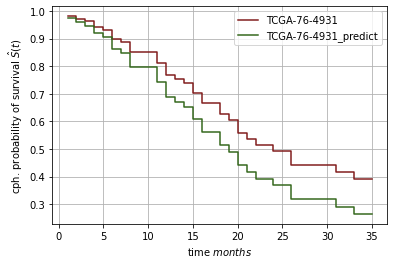

In [15]:
# patient TCGA-76-4931 who 4
time_points = np.arange(1, 36)
pred_surv_predict = cph.predict_survival_function(test_gene_predict)
pred_surv = cph.predict_survival_function(test_gene)
plt.step(time_points, pred_surv[27](time_points), where="post", label='TCGA-76-4931',color = (0.5, 0.1, 0.1))
plt.step(time_points, pred_surv_predict[33](time_points), where="post", label='TCGA-76-4931_predict',color = (0.2, 0.4, 0.1) )
plt.ylabel("cph. probability of survival $\hat{S}(t)$")
plt.xlabel("time $months$")
plt.legend(loc="best")
plt.grid()

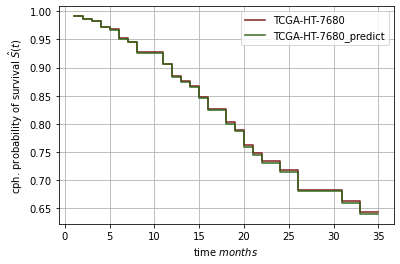

In [16]:
# patient TCGA-HT-7680 who 2
time_points = np.arange(1, 36)
pred_surv_predict = cph.predict_survival_function(test_gene_predict)
pred_surv = cph.predict_survival_function(test_gene)
plt.step(time_points, pred_surv[2](time_points), where="post", label='TCGA-HT-7680',color = (0.5, 0.1, 0.1))
plt.step(time_points, pred_surv_predict[18](time_points), where="post", label='TCGA-HT-7680_predict',color = (0.2, 0.4, 0.1) )
plt.ylabel("cph. probability of survival $\hat{S}(t)$")
plt.xlabel("time $months$")
plt.legend(loc="best")
plt.grid()

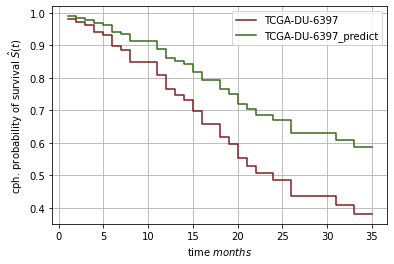

In [17]:
# patient TCGA-DU-6397 who 3
time_points = np.arange(1, 36)
pred_surv_predict = cph.predict_survival_function(test_gene_predict)
pred_surv = cph.predict_survival_function(test_gene)
plt.step(time_points, pred_surv[9](time_points), where="post", label='TCGA-DU-6397',color = (0.5, 0.1, 0.1))
plt.step(time_points, pred_surv_predict[6](time_points), where="post", label='TCGA-DU-6397_predict',color = (0.2, 0.4, 0.1) )
plt.ylabel("cph. probability of survival $\hat{S}(t)$")
plt.xlabel("time $months$")
plt.legend(loc="best")
plt.grid()

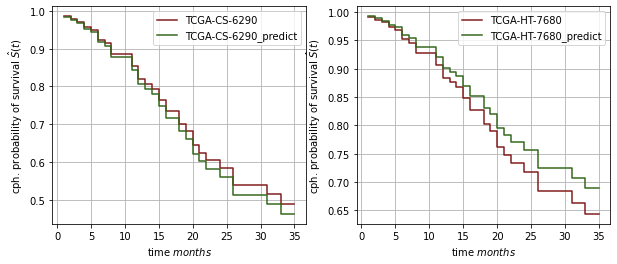

In [21]:
time_points = np.arange(1, 36)
pred_surv_predict = cph.predict_survival_function(test_gene_predict)
pred_surv = cph.predict_survival_function(test_gene)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.step(time_points, pred_surv[1](time_points), where="post", label='TCGA-CS-6290',color = (0.5, 0.1, 0.1))
plt.step(time_points, pred_surv_predict[0](time_points), where="post", label='TCGA-CS-6290_predict',color = (0.2, 0.4, 0.1) )
plt.ylabel("cph. probability of survival $\hat{S}(t)$")
plt.xlabel("time $months$")
plt.legend(loc="best")
plt.grid()

plt.subplot(1,2,2)
plt.step(time_points, pred_surv[2](time_points), where="post", label='TCGA-HT-7680',color = (0.5, 0.1, 0.1))
plt.step(time_points, pred_surv_predict[18](time_points), where="post", label='TCGA-HT-7680_predict',color = (0.2, 0.4, 0.1) )
plt.ylabel("cph. probability of survival $\hat{S}(t)$")
plt.xlabel("time $months$")
plt.legend(loc="best")
plt.grid()

# plt.subplot(2,2,3)
# plt.step(time_points, pred_surv[27](time_points), where="post", label='TCGA-76-4931',color = (0.5, 0.1, 0.1))
# plt.step(time_points, pred_surv_predict[33](time_points), where="post", label='TCGA-76-4931_predict',color = (0.2, 0.4, 0.1) )
# plt.ylabel("cph. probability of survival $\hat{S}(t)$")
# plt.xlabel("time $months$")
# plt.legend(loc="best")
# plt.grid()

# plt.subplot(2,2,4)
# plt.step(time_points, pred_surv[4](time_points), where="post", label='TCGA-06-0158',color = (0.5, 0.1, 0.1))
# plt.step(time_points, pred_surv_predict[26](time_points), where="post", label='TCGA-06-0158_predict',color = (0.2, 0.4, 0.1) )
# plt.ylabel("cph. probability of survival $\hat{S}(t)$")
# plt.xlabel("time $months$")
# plt.legend(loc="best")
# plt.grid()

plt.savefig('/root/autodl-tmp/MR_csv/my_project/img/risk_curve.png', dpi=300)